In [1]:
import magic
import sys, os
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import pandas as pd

In [2]:
def process_matlab_output(a):
    m,n = a.shape
    if m==1 and n==1:
        return a[0][0]
    if m==1 or n==1:
        return a.reshape(-1)
    return a

def abslog(a):
    return np.log10(np.abs(a))

In [3]:
def compute_vertices(angles, rads):
    c = np.cos(angles)
    s = np.sin(angles)
    return np.array([c*rads, s*rads]).reshape(2,-1)

def compute_symmetric_vertices(rads):
    n = 2*len(rads)
    angles = np.arange(0, n)*np.pi/(n-1)
    rads = list(rads)
    rads = np.array(rads+rads[::-1])
    return compute_vertices(angles, rads)

In [4]:
res = []
fd = f'/home/zj/shape_optimization_results/so0628/gd2'
fns = os.listdir(fd)
for fn in fns:
    res.append(loadmat(f'{fd}/{fn}'))
df = pd.DataFrame(res)
cols = [
    'h', 'n', 'rads', 'f_zero', 'grad', 'f_plus', 'f_minus', 'f_next', 'rads_next', 'improvement', 'iter_idx','step'
]
df = df[cols]
for c in cols:
    df[c] = df[c].apply(process_matlab_output)
df = df.sort_values('iter_idx').reset_index(drop = True)
df['vertices'] = df.rads.apply(compute_symmetric_vertices)

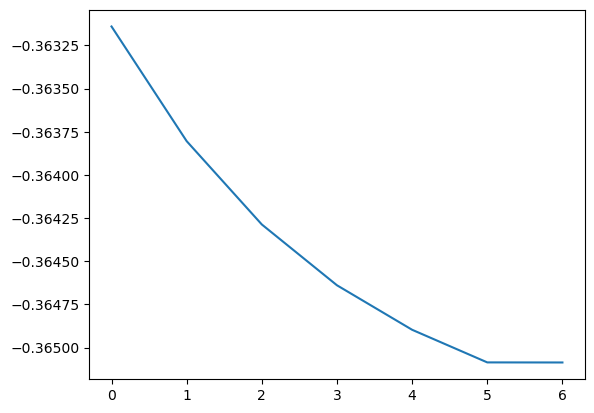

In [15]:
plt.plot(df.f_zero)

(-1.192166731429423,
 1.192166731429423,
 -0.05166215074799418,
 1.0849051657078777)

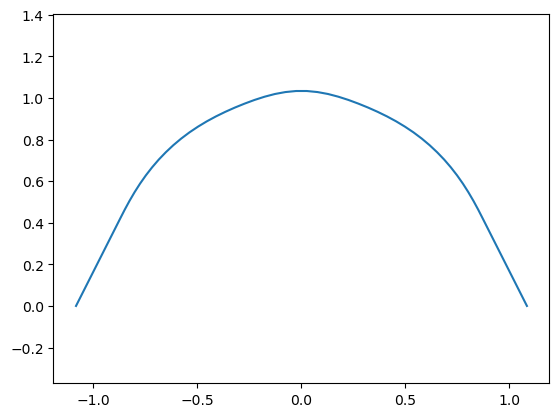

In [14]:
plt.plot(*vs[6])
plt.axis('equal')

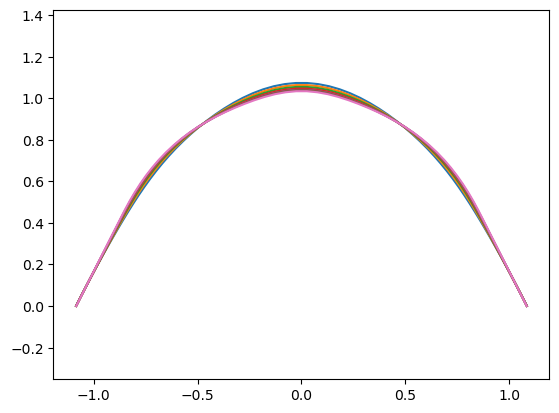

In [7]:
vs = df.vertices
for v in vs:
    plt.plot(*v)
    plt.axis('equal')

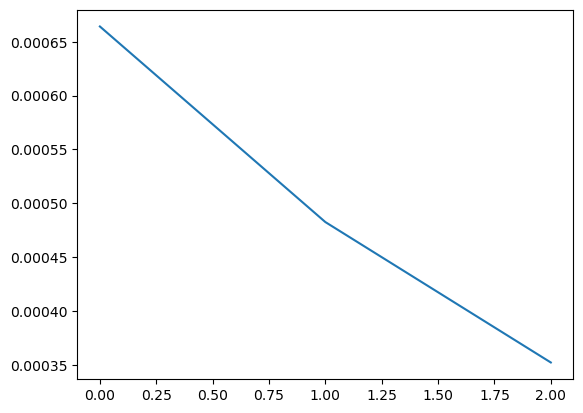

In [40]:
plt.plot(df.improvement)

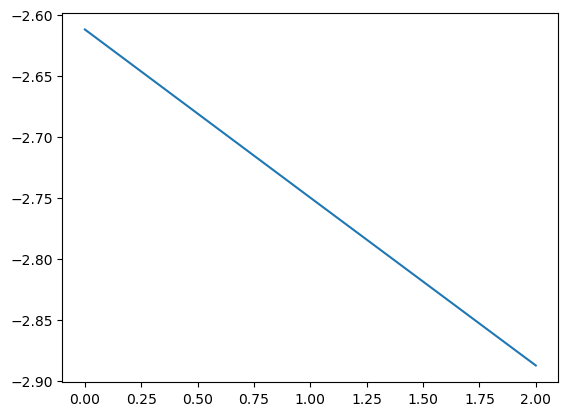

In [38]:
plt.plot(np.log10(df.f_zero-optimal))

In [7]:
df.columns

Index(['__header__', '__version__', '__globals__', 'dump_dir', 'h',
       'min_step_size', 'max_iter', 'init_rads', 'result', 'half_n', 'n',
       'conv_eps', 'rads', 'vertices', 'loss_params', 'loss', 'chebabs', 'zk',
       'min_step_size_reached', 'max_iter_reached', 'not_converged',
       'iter_idx', 'f_zero', 'grad', 'rad_index', 'h_vector', 'f_plus',
       'f_minus', 'step', 'nice_shape', 'positive_radius', 'not_improving',
       'rads_next', 'f_next', 'improvement'],
      dtype='object')